In [2]:
#지역별 그래프

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
# 파일의 인코딩 감지
df1 = pd.read_csv('D:\FILE\서울.csv')
df2 = pd.read_csv('D:\FILE\진조우.csv')
df3 = pd.read_csv('D:\FILE\베이징.csv')
# 예제 데이터 생성 (실제 데이터에 맞게 수정 필요)
서울 = df1
진조우 = df2
베이징 = df3

# 공백 제거 및 소문자로 변환
for data in [서울, 진조우, 베이징]:
    data.columns = data.columns.str.strip().str.lower()

# 날짜 컬럼을 datetime 형식으로 변환
for data in [서울, 진조우, 베이징]:
    data['date'] = pd.to_datetime(data['date'])
dfdate = 6
# 2024년 5월 데이터 필터링
서울_2024 = 서울[(서울['date'].dt.year == 2024) & (서울['date'].dt.month == dfdate)]
진조우_2024 = 진조우[(진조우['date'].dt.year == 2024) & (진조우['date'].dt.month == dfdate)]
베이징_2024 = 베이징[(베이징['date'].dt.year == 2024) & (베이징['date'].dt.month == dfdate)]

# 년도별 색상 설정
colors = ['b', 'g', 'r']
years1 = 서울_2024['date'].dt.year.unique()
years2 = 진조우_2024['date'].dt.year.unique()
years3 = 베이징_2024['date'].dt.year.unique()


# 각 컬럼에 대한 그래프 그리기
pollutants = ['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']

for pollutant in pollutants:
    plt.figure(figsize=(10, 6))
    
    # 서울 그래프 추가
    all_data = []
    for year in years1:
        yearly_data = 서울_2024[서울_2024['date'].dt.year == year]
        yearly_data[pollutant] = pd.to_numeric(yearly_data[pollutant], errors='coerce')
        all_data.extend(yearly_data[pollutant])
        plt.plot(yearly_data['date'].dt.strftime('%m-%d'), yearly_data[pollutant], label='Seoul', color='b')
    
    # 진조우 그래프 추가
    for year in years2:
        yearly_data = 진조우_2024[진조우_2024['date'].dt.year == year]
        yearly_data[pollutant] = pd.to_numeric(yearly_data[pollutant], errors='coerce')
        all_data.extend(yearly_data[pollutant])
        plt.plot(yearly_data['date'].dt.strftime('%m-%d'), yearly_data[pollutant], label='Jinzhou', color='g')
    
    # 베이징 그래프 추가
    for year in years3:
        yearly_data = 베이징_2024[베이징_2024['date'].dt.year == year]
        yearly_data[pollutant] = pd.to_numeric(yearly_data[pollutant], errors='coerce')
        all_data.extend(yearly_data[pollutant])
        plt.plot(yearly_data['date'].dt.strftime('%m-%d'), yearly_data[pollutant], label='Beijing', color='r')
    
    # 데이터에서 최소 및 최대값 계산
    min_value = min(all_data)
    max_value = max(all_data)
    
    # y축 범위 설정
    y_range = max_value - min_value
    plt.ylim(min_value - 0.1 * y_range, max_value + 0.1 * y_range)
    
    plt.xlabel('Date')
    plt.ylabel(f'{pollutant.upper()} (μg/m³)')
    plt.title(f'{pollutant.upper()} ')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f'{pollutant}_2024.png')
    plt.show()


# 년도별그래프
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# 파일의 인코딩 감지 및 데이터 로드
df1 = pd.read_csv('D:\FILE\\서울.csv')
df2 = pd.read_csv('D:\FILE\진조우.csv')
df3 = pd.read_csv('D:\FILE\베이징.csv')

# 데이터프레임 변수 설정
서울 = df1
진조우 = df2
베이징 = df3

# 공백 제거 및 소문자로 변환
for data in [서울, 진조우, 베이징]:
    data.columns = data.columns.str.strip().str.lower()

# 날짜 컬럼을 datetime 형식으로 변환
for data in [서울, 진조우, 베이징]:
    data['date'] = pd.to_datetime(data['date'])

# 2024년 6월 데이터 필터링
dfdate = 6
서울_2024 = 서울[((서울['date'].dt.year >= 2020) & (서울['date'].dt.year <= 2024)) & (서울['date'].dt.month == dfdate)]

# 년도별 색상 설정
colors = ['b', 'g', 'r', 'c', 'm']

# 각 컬럼에 대한 그래프 그리기
pollutants = ['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']

# 경고 메시지 숨기기
warnings.filterwarnings("ignore")

for pollutant in pollutants:
    plt.figure(figsize=(10, 6))
    
    # 서울 그래프 추가
    all_data = []
    for i, year in enumerate(서울_2024['date'].dt.year.unique()):
        yearly_data = 서울_2024[서울_2024['date'].dt.year == year]
        yearly_data[pollutant] = pd.to_numeric(yearly_data[pollutant], errors='coerce')
        all_data.extend(yearly_data[pollutant])
        plt.plot(yearly_data['date'].dt.strftime('%m-%d'), yearly_data[pollutant], 
                 label=f'{year}', color=colors[i % len(colors)])
    
    # 데이터에서 최소 및 최대값 계산
    min_value = min(all_data)
    max_value = max(all_data)
    
    # y축 범위 설정
    y_range = max_value - min_value
    plt.ylim(min_value - 0.1 * y_range, max_value + 0.1 * y_range)
    
    plt.xlabel('DATE')
    plt.ylabel(f'{pollutant.upper()} (μg/m³)')
    plt.title(f'{pollutant.upper()}')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f'{pollutant}_2024.png')
    plt.show()  # 모든 그래프를 한 번에 표시
    
# pm25 월별로 비교할 수 있는 그래프, 연은 범위 지정할수있습니다.
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# 파일의 인코딩 감지 및 데이터 로드
df1 = pd.read_csv('D:\FILE\\서울.csv')
df2 = pd.read_csv('D:\FILE\진조우.csv')
df3 = pd.read_csv('D:\FILE\베이징.csv')

# 데이터프레임 변수 설정
서울 = df1
진조우 = df2
베이징 = df3

# 공백 제거 및 소문자로 변환
for data in [서울, 진조우, 베이징]:
    data.columns = data.columns.str.strip().str.lower()

# 날짜 컬럼을 datetime 형식으로 변환
for data in [서울, 진조우, 베이징]:
    data['date'] = pd.to_datetime(data['date'])

# 경고 메시지 숨기기
warnings.filterwarnings("ignore")

# 년도별 색상 설정
colors = ['b', 'g', 'r', 'c', 'm']

# 하나의 그래프만 출력 (pm25에 대한 그래프만 출력)
pollutant = 'pm25'

# 2024년 6월 데이터 필터링
for dfdate in range(1, 13):
    서울_2024 = 서울[((서울['date'].dt.year >= 2022) & (서울['date'].dt.year <= 2024)) & (서울['date'].dt.month == dfdate)]
    
    plt.figure(figsize=(10, 3))

    # 서울 그래프 추가
    all_data = []
    for i, year in enumerate(서울_2024['date'].dt.year.unique()):
        yearly_data = 서울_2024[서울_2024['date'].dt.year == year]
        yearly_data[pollutant] = pd.to_numeric(yearly_data[pollutant], errors='coerce')
        yearly_data = yearly_data.sort_values(by='date')
        all_data.extend(yearly_data[pollutant])
        plt.plot(yearly_data['date'].dt.strftime('%m-%d'), yearly_data[pollutant], 
                 label=f'{year}', color=colors[i % len(colors)])

    # 데이터에서 최소 및 최대값 계산
    if all_data:  # 데이터가 존재하는 경우에만 계산
        min_value = min(all_data)
        max_value = max(all_data)

        # y축 범위 설정
        y_range = max_value - min_value
        plt.ylim(min_value - 0.1 * y_range, max_value + 0.1 * y_range)

    plt.xlabel('DATE')
    plt.ylabel(f'{pollutant.upper()} (μg/m³)')
    plt.title(f'{pollutant.upper()} - {dfdate}')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f'{pollutant}_2024_{dfdate}.png')
    plt.show()  # 그래프를 표시


# 같은 방식으로 pm10 그래프 만드는 법
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# 파일의 인코딩 감지 및 데이터 로드
df1 = pd.read_csv('D:\FILE\\서울.csv')
df2 = pd.read_csv('D:\FILE\진조우.csv')
df3 = pd.read_csv('D:\FILE\베이징.csv')

# 데이터프레임 변수 설정
서울 = df1
진조우 = df2
베이징 = df3

# 공백 제거 및 소문자로 변환
for data in [서울, 진조우, 베이징]:
    data.columns = data.columns.str.strip().str.lower()

# 날짜 컬럼을 datetime 형식으로 변환
for data in [서울, 진조우, 베이징]:
    data['date'] = pd.to_datetime(data['date'])

# 경고 메시지 숨기기
warnings.filterwarnings("ignore")

# 년도별 색상 설정
colors = ['b', 'g', 'r', 'c', 'm']

# 하나의 그래프만 출력 (pm25에 대한 그래프만 출력)
pollutant = 'pm10'

# 2024년 6월 데이터 필터링
for dfdate in range(1, 13):
    서울_2024 = 서울[((서울['date'].dt.year >= 2022) & (서울['date'].dt.year <= 2024)) & (서울['date'].dt.month == dfdate)]
    
    plt.figure(figsize=(10, 3))

    # 서울 그래프 추가
    all_data = []
    for i, year in enumerate(서울_2024['date'].dt.year.unique()):
        yearly_data = 서울_2024[서울_2024['date'].dt.year == year]
        yearly_data[pollutant] = pd.to_numeric(yearly_data[pollutant], errors='coerce')
        yearly_data = yearly_data.sort_values(by='date')
        all_data.extend(yearly_data[pollutant])
        plt.plot(yearly_data['date'].dt.strftime('%m-%d'), yearly_data[pollutant], 
                 label=f'{year}', color=colors[i % len(colors)])

    # 데이터에서 최소 및 최대값 계산
    if all_data:  # 데이터가 존재하는 경우에만 계산
        min_value = min(all_data)
        max_value = max(all_data)

        # y축 범위 설정
        y_range = max_value - min_value
        plt.ylim(min_value - 0.1 * y_range, max_value + 0.1 * y_range)
    plt.rcParams['font.family'] = 'D2coding'
    plt.xlabel('DATE')
    plt.ylabel(f'{pollutant.upper()} (μg/m³)')
    plt.title(f'{pollutant.upper()} - {dfdate}')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f'{pollutant}_2024_{dfdate}.png')
    plt.show()  # 그래프를 표시


ModuleNotFoundError: No module named 'chardet'

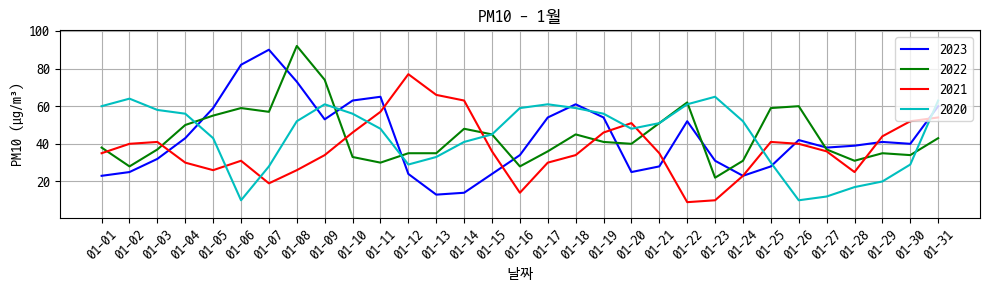

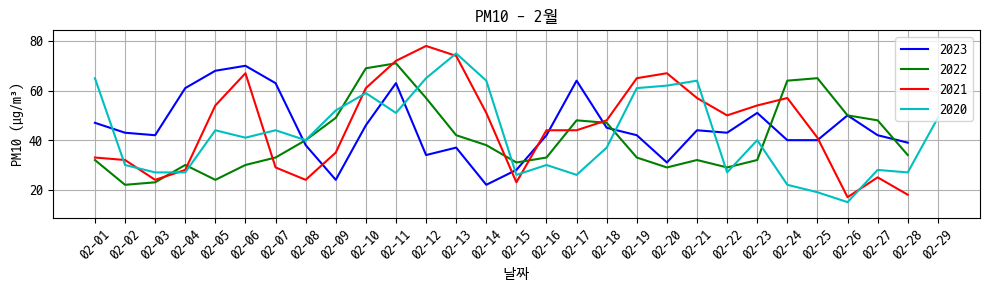

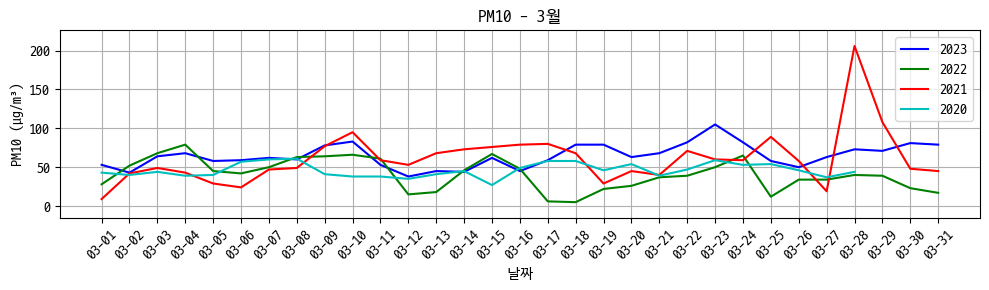

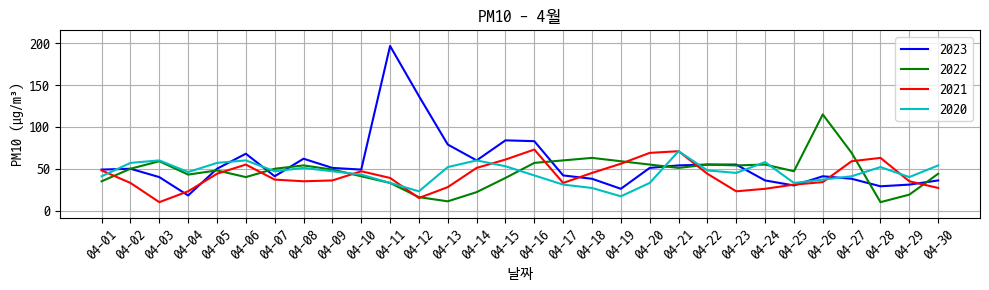

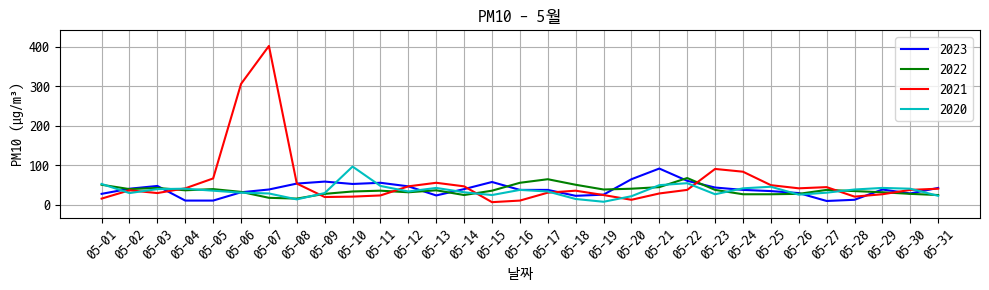

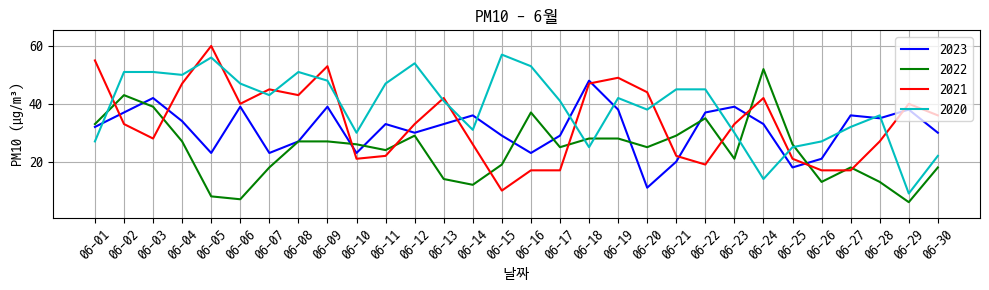

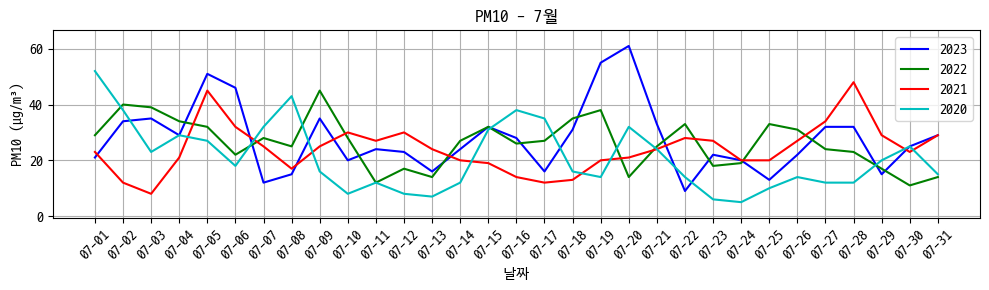

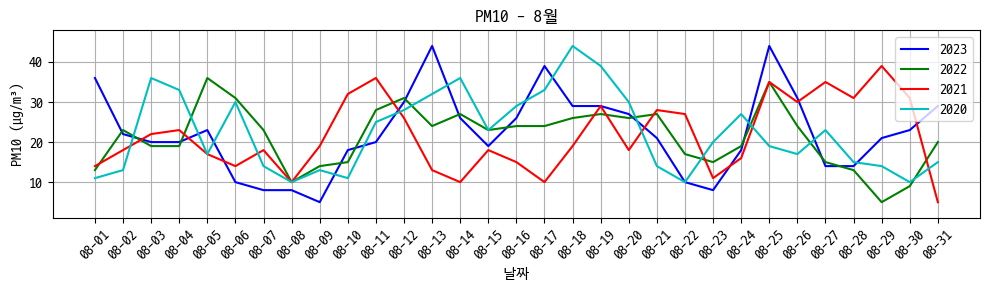

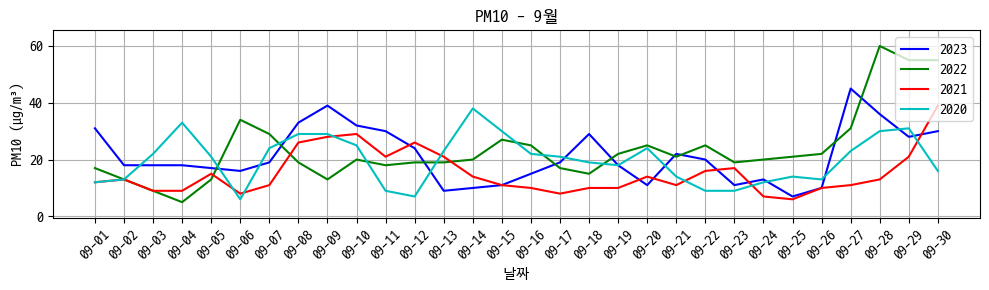

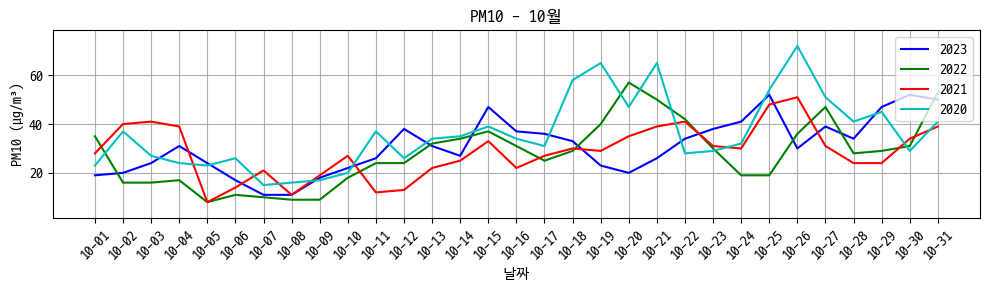

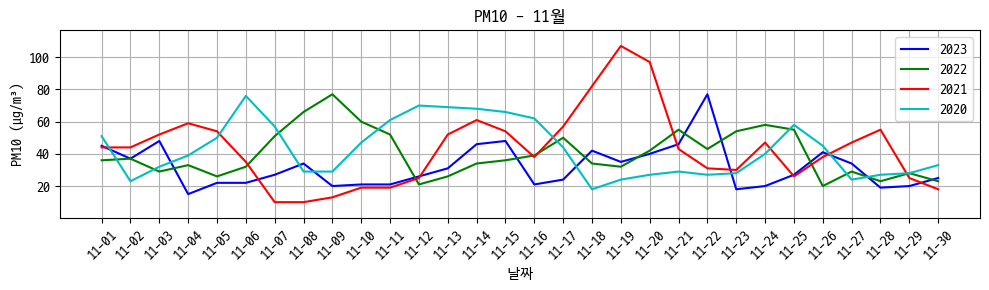

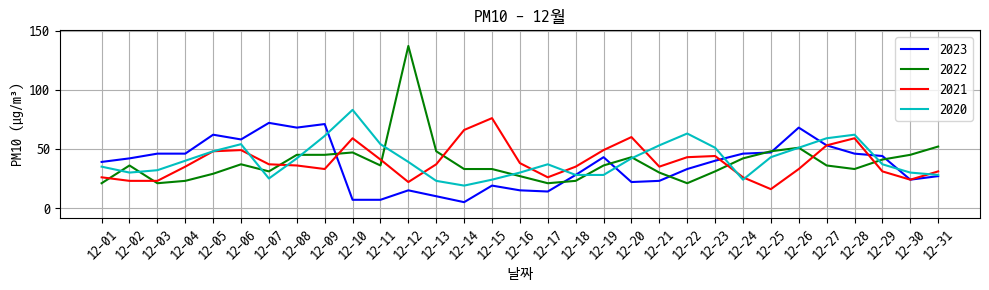

In [6]:
# 같은 방식으로 pm10 그래프 만드는 법
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# 파일의 인코딩 감지 및 데이터 로드
df1 = pd.read_csv('D:\FILE\\서울.csv')
df2 = pd.read_csv('D:\FILE\진조우.csv')
df3 = pd.read_csv('D:\FILE\베이징.csv')

# 데이터프레임 변수 설정
서울 = df1
진조우 = df2
베이징 = df3

# 공백 제거 및 소문자로 변환
for data in [서울, 진조우, 베이징]:
    data.columns = data.columns.str.strip().str.lower()

# 날짜 컬럼을 datetime 형식으로 변환
for data in [서울, 진조우, 베이징]:
    data['date'] = pd.to_datetime(data['date'])

# 경고 메시지 숨기기
warnings.filterwarnings("ignore")

# 년도별 색상 설정
colors = ['b', 'g', 'r', 'c', 'm']

# 하나의 그래프만 출력 (pm25에 대한 그래프만 출력)
pollutant = 'pm10'

# 2024년 6월 데이터 필터링
for dfdate in range(1, 13):
    plt.rcParams['font.family'] = 'D2coding'
    서울_2024 = 서울[((서울['date'].dt.year >= 2020) & (서울['date'].dt.year <= 2023)) & (서울['date'].dt.month == dfdate)]
    
    plt.figure(figsize=(10, 3))

    # 서울 그래프 추가
    all_data = []
    for i, year in enumerate(서울_2024['date'].dt.year.unique()):
        yearly_data = 서울_2024[서울_2024['date'].dt.year == year]
        yearly_data[pollutant] = pd.to_numeric(yearly_data[pollutant], errors='coerce')
        yearly_data = yearly_data.sort_values(by='date')
        all_data.extend(yearly_data[pollutant])
        plt.plot(yearly_data['date'].dt.strftime('%m-%d'), yearly_data[pollutant], 
                 label=f'{year}', color=colors[i % len(colors)])

    # 데이터에서 최소 및 최대값 계산
    if all_data:  # 데이터가 존재하는 경우에만 계산
        min_value = min(all_data)
        max_value = max(all_data)

        # y축 범위 설정
        y_range = max_value - min_value
        plt.ylim(min_value - 0.1 * y_range, max_value + 0.1 * y_range)
    
    plt.xlabel('날짜')
    plt.ylabel(f'{pollutant.upper()} (μg/m³)')
    plt.title(f'{pollutant.upper()} - {dfdate}월')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()  # 그래프를 표시

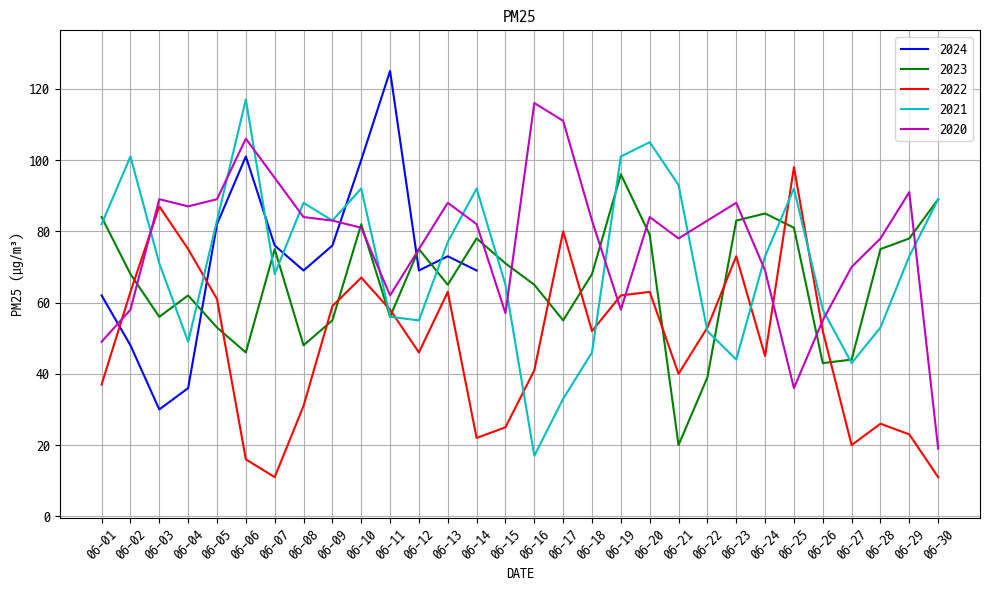

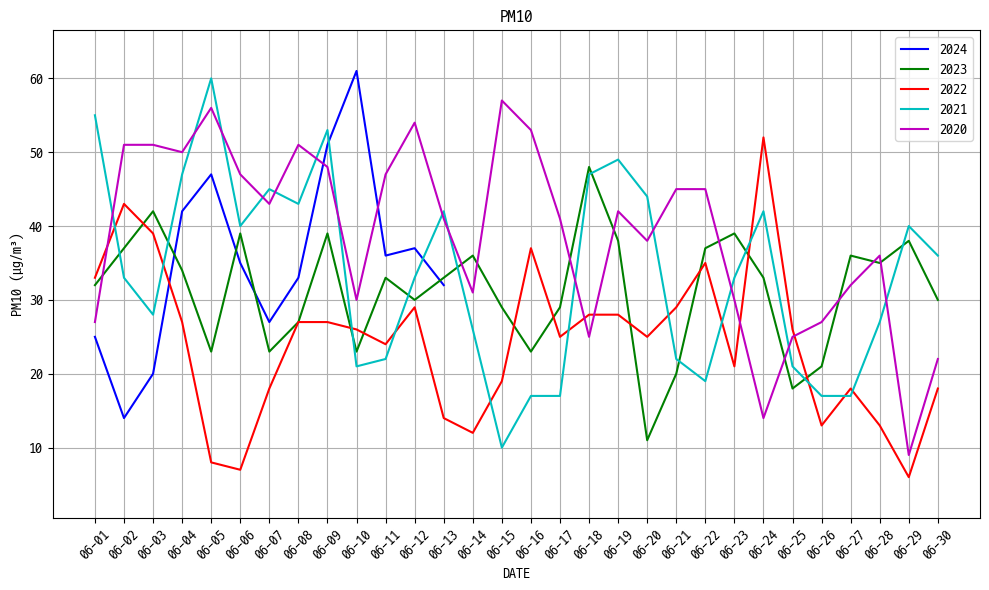

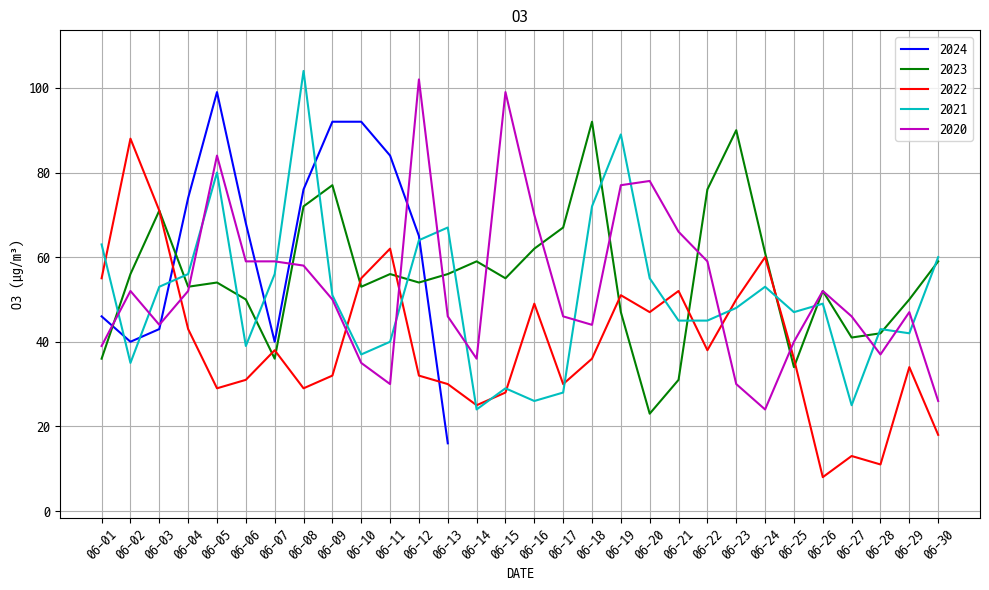

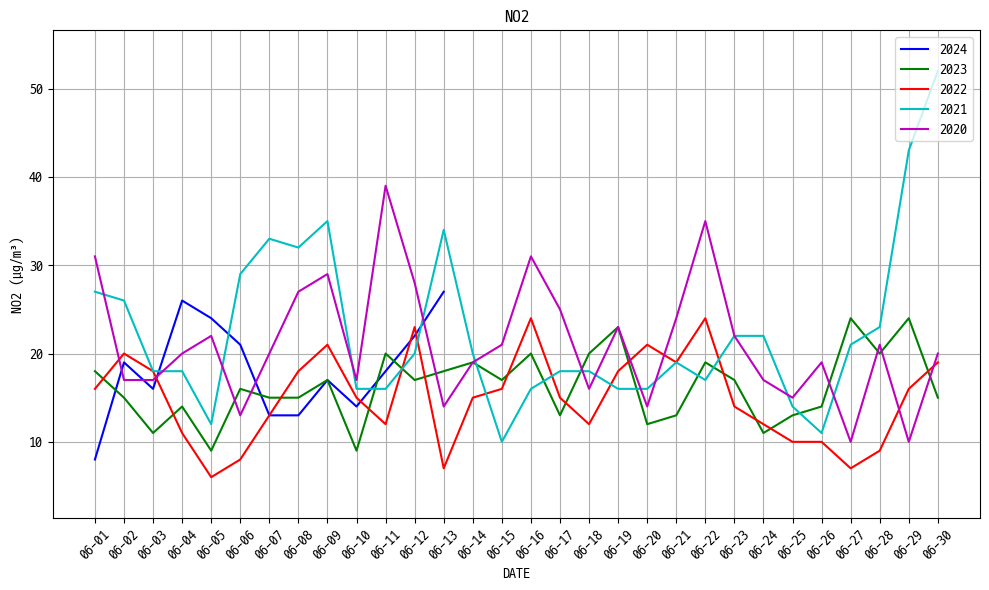

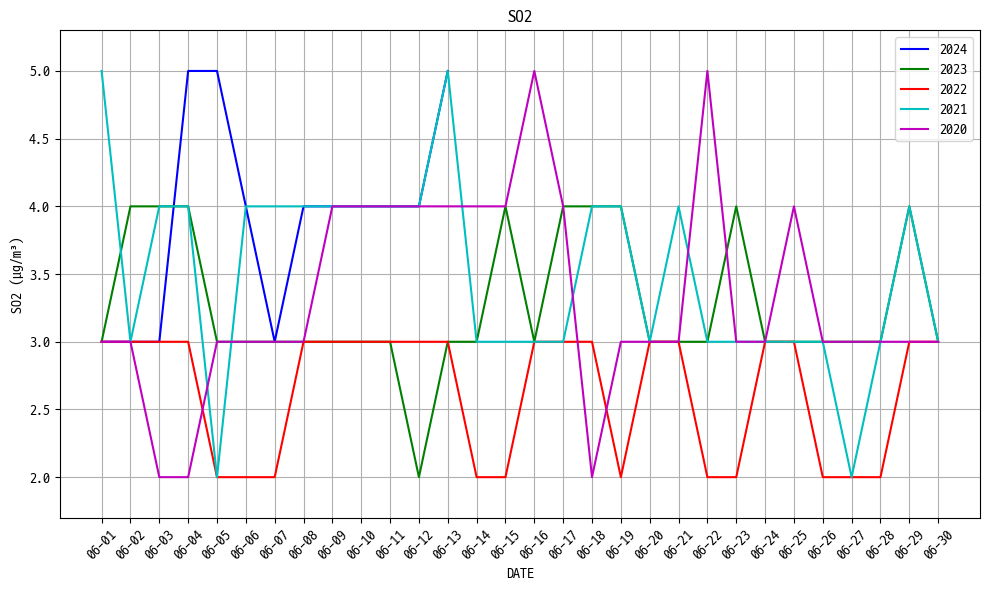

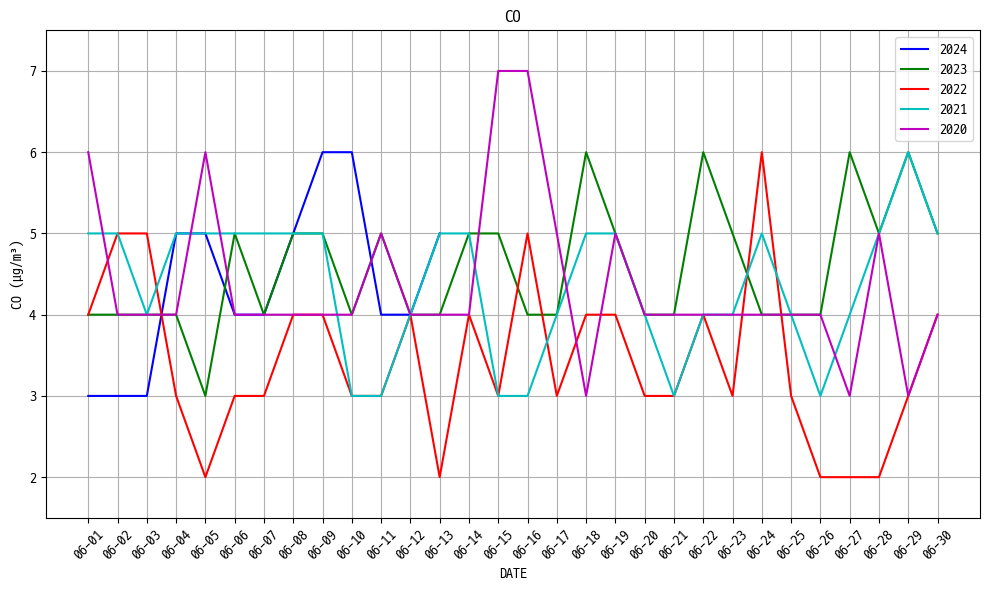

In [7]:
# 년도별그래프
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# 파일의 인코딩 감지 및 데이터 로드
df1 = pd.read_csv('D:\FILE\\서울.csv')
df2 = pd.read_csv('D:\FILE\진조우.csv')
df3 = pd.read_csv('D:\FILE\베이징.csv')

# 데이터프레임 변수 설정
서울 = df1
진조우 = df2
베이징 = df3

# 공백 제거 및 소문자로 변환
for data in [서울, 진조우, 베이징]:
    data.columns = data.columns.str.strip().str.lower()

# 날짜 컬럼을 datetime 형식으로 변환
for data in [서울, 진조우, 베이징]:
    data['date'] = pd.to_datetime(data['date'])

# 2024년 6월 데이터 필터링
dfdate = 6
서울_2024 = 서울[((서울['date'].dt.year >= 2020) & (서울['date'].dt.year <= 2024)) & (서울['date'].dt.month == dfdate)]

# 년도별 색상 설정
colors = ['b', 'g', 'r', 'c', 'm']

# 각 컬럼에 대한 그래프 그리기
pollutants = ['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']

# 경고 메시지 숨기기
warnings.filterwarnings("ignore")

for pollutant in pollutants:
    plt.figure(figsize=(10, 6))
    
    # 서울 그래프 추가
    all_data = []
    for i, year in enumerate(서울_2024['date'].dt.year.unique()):
        yearly_data = 서울_2024[서울_2024['date'].dt.year == year]
        yearly_data[pollutant] = pd.to_numeric(yearly_data[pollutant], errors='coerce')
        all_data.extend(yearly_data[pollutant])
        plt.plot(yearly_data['date'].dt.strftime('%m-%d'), yearly_data[pollutant], 
                 label=f'{year}', color=colors[i % len(colors)])
    
    # 데이터에서 최소 및 최대값 계산
    min_value = min(all_data)
    max_value = max(all_data)
    
    # y축 범위 설정
    y_range = max_value - min_value
    plt.ylim(min_value - 0.1 * y_range, max_value + 0.1 * y_range)
    
    plt.xlabel('DATE')
    plt.ylabel(f'{pollutant.upper()} (μg/m³)')
    plt.title(f'{pollutant.upper()}')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()  # 모든 그래프를 한 번에 표시

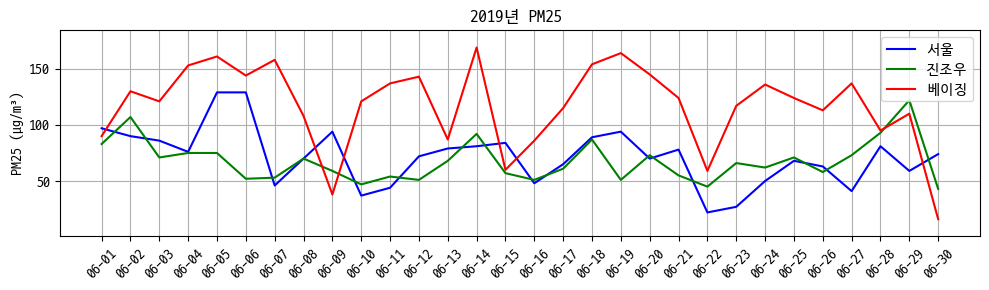

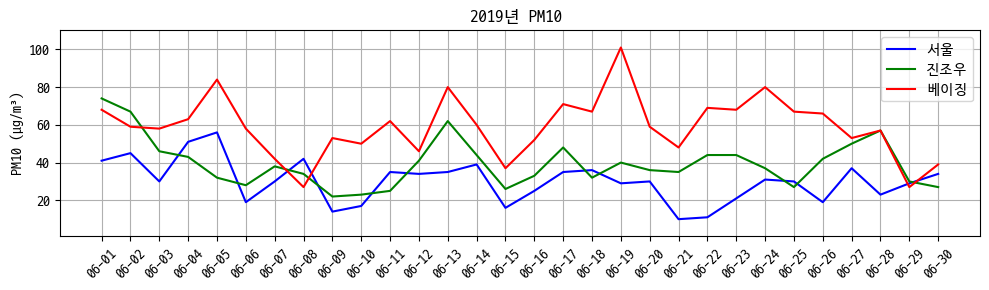

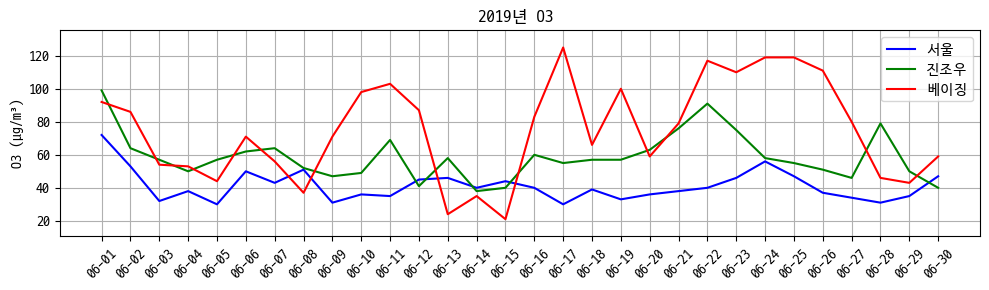

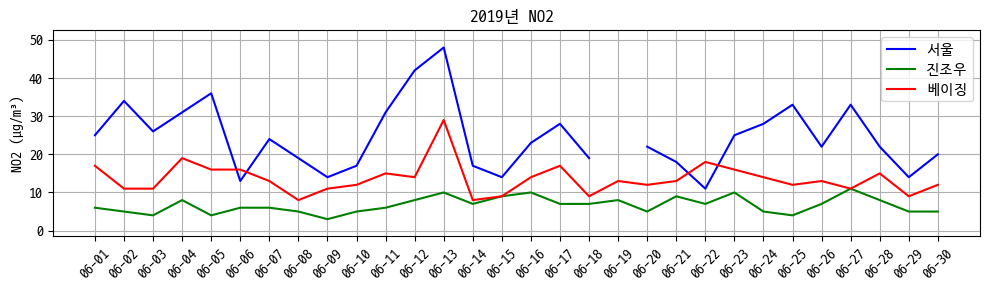

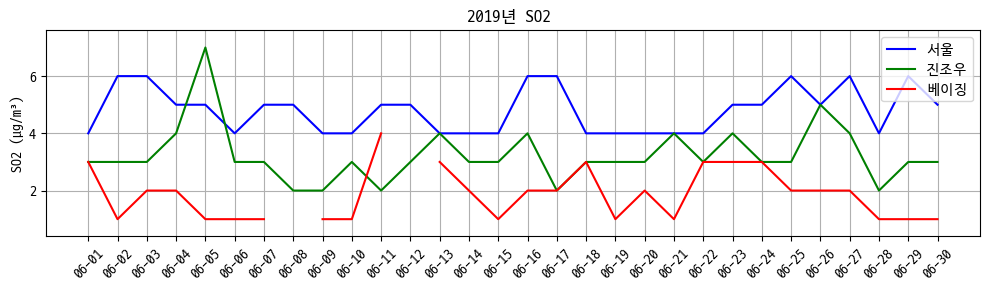

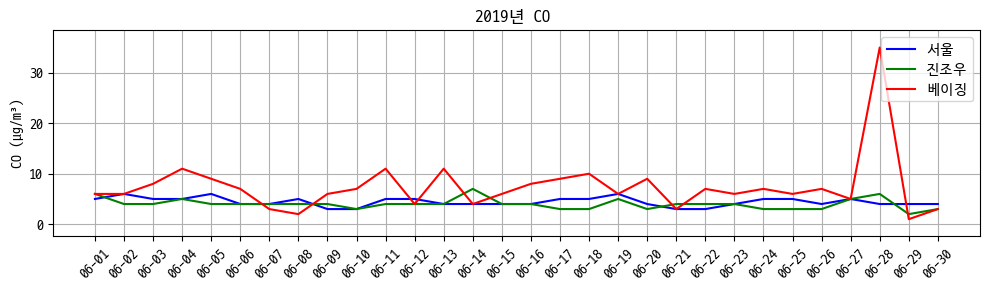

In [17]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
# 파일의 인코딩 감지
df1 = pd.read_csv('D:\FILE\서울.csv')
df2 = pd.read_csv('D:\FILE\진조우.csv')
df3 = pd.read_csv('D:\FILE\베이징.csv')
# 예제 데이터 생성 (실제 데이터에 맞게 수정 필요)
서울 = df1
진조우 = df2
베이징 = df3

# 공백 제거 및 소문자로 변환
for data in [서울, 진조우, 베이징]:
    data.columns = data.columns.str.strip().str.lower()

# 날짜 컬럼을 datetime 형식으로 변환
for data in [서울, 진조우, 베이징]:
    data['date'] = pd.to_datetime(data['date'])
dfyear = 2019
dfdate = 6
# 2024년 5월 데이터 필터링
서울_2024 = 서울[(서울['date'].dt.year == dfyear) & (서울['date'].dt.month == dfdate)]
진조우_2024 = 진조우[(진조우['date'].dt.year == dfyear) & (진조우['date'].dt.month == dfdate)]
베이징_2024 = 베이징[(베이징['date'].dt.year == dfyear) & (베이징['date'].dt.month == dfdate)]

# 년도별 색상 설정
colors = ['b', 'g', 'r']
years1 = 서울_2024['date'].dt.year.unique()
years2 = 진조우_2024['date'].dt.year.unique()
years3 = 베이징_2024['date'].dt.year.unique()


# 각 컬럼에 대한 그래프 그리기
pollutants = ['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']

for pollutant in pollutants:
    plt.rcParams['font.family'] = 'D2coding'
    plt.figure(figsize=(10, 3))
    
    # 서울 그래프 추가
    all_data = []
    for year in years1:
        yearly_data = 서울_2024[서울_2024['date'].dt.year == year]
        yearly_data[pollutant] = pd.to_numeric(yearly_data[pollutant], errors='coerce')
        all_data.extend(yearly_data[pollutant])
        plt.plot(yearly_data['date'].dt.strftime('%m-%d'), yearly_data[pollutant], label='서울', color='b')
    
    # 진조우 그래프 추가
    for year in years2:
        yearly_data = 진조우_2024[진조우_2024['date'].dt.year == year]
        yearly_data[pollutant] = pd.to_numeric(yearly_data[pollutant], errors='coerce')
        all_data.extend(yearly_data[pollutant])
        plt.plot(yearly_data['date'].dt.strftime('%m-%d'), yearly_data[pollutant], label='진조우', color='g')
    
    # 베이징 그래프 추가
    for year in years3:
        yearly_data = 베이징_2024[베이징_2024['date'].dt.year == year]
        yearly_data[pollutant] = pd.to_numeric(yearly_data[pollutant], errors='coerce')
        all_data.extend(yearly_data[pollutant])
        plt.plot(yearly_data['date'].dt.strftime('%m-%d'), yearly_data[pollutant], label='베이징', color='r')
    
    # 데이터에서 최소 및 최대값 계산
    min_value = min(all_data)
    max_value = max(all_data)
    
    # y축 범위 설정
    y_range = max_value - min_value
    plt.ylim(min_value - 0.1 * y_range, max_value + 0.1 * y_range)
    
    plt.ylabel(f'{pollutant.upper()} (μg/m³)')
    plt.title(f'{dfyear}년 ' f'{pollutant.upper()} ')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()